### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [2]:
# your code and solutions
df = pd.read_csv('./The E-commerce Dataset.csv')
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [3]:
df[['gender','rating','helpfulness']].isnull().sum()

gender         27
rating         17
helpfulness    22
dtype: int64

In [4]:
len(df)

20000

In [6]:
df.drop(df[df.rating==0].index, inplace=True)
df.drop(df[df.helpfulness==0].index, inplace=True)
df.gender.dropna(inplace=True)
df.review.dropna(inplace=True)

In [7]:
len(df)

14074

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [8]:
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19992,10805,11900,R.I.P,MTV,1.0,4.0,F,Media,39,138.00,18
19993,10805,12000,Leave them be...,Teletubbies,5.0,4.0,F,Kids & Family,76,48.25,18
19994,10805,50500,"Thank you, Drive Thru Please",McDonald's,3.0,3.0,F,Restaurants & Gourmet,41,30.74,18
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18


In [9]:
# your code and solutions
# Q2.1
df[['userId','review','item','category']].nunique()

userId       6829
review      13808
item           89
category        9
dtype: int64

In [10]:
# Q2.2
df.rating.describe()

count    14064.000000
mean         3.703712
std          1.404434
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [11]:
# Q2.3
df.groupby(['gender','item'])['rating'].agg(['mean','std','max','min'])

mean       std  max  min
gender item                                               
F      AOL (America Online)   2.505988  1.341739  5.0  1.0
       All Advantage          3.585253  1.519431  5.0  1.0
       Alta Vista (by 1stUp)  3.659091  1.218905  5.0  1.0
       Amazon.com             3.718310  1.475351  5.0  1.0
       American Airlines      3.194030  1.384315  5.0  1.0
...                                ...       ...  ...  ...
M      Wendy's                3.797468  1.158909  5.0  1.0
       What Lies Beneath      3.482143  1.235697  5.0  1.0
       X-Men                  4.202381  0.772724  5.0  1.0
       X.com                  4.209677  1.450123  5.0  1.0
       eBay                   4.346667  0.956556  5.0  1.0

[178 rows x 4 columns]

In [12]:
# Q2.4
df.groupby('item')['rating'].agg(['mean','std','max','min'])

,mean,std,max,min
item,,,,
AOL (America Online),2.455587,1.377792,5.0,1.0
All Advantage,3.438636,1.561454,5.0,1.0
Alta Vista (by 1stUp),3.537736,1.288591,5.0,1.0
Amazon.com,3.725610,1.524146,5.0,1.0
American Airlines,3.036765,1.405851,5.0,1.0
...,...,...,...,...
Wendy's,3.917241,1.127334,5.0,1.0
What Lies Beneath,3.417476,1.200688,5.0,1.0
X-Men,4.085714,0.849998,5.0,1.0


##### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [13]:
import seaborn as sns


<Axes: xlabel='gender', ylabel='rating'>

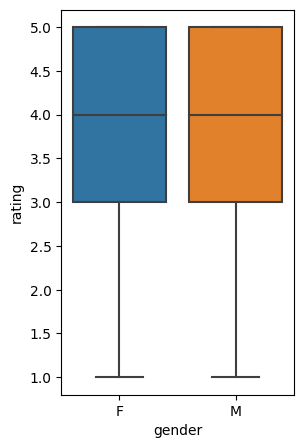

In [14]:
# your code and solutions
plt.figure(figsize=(3,5))
sns.boxplot(x=df['gender'], y=df['rating'])

The median of the rating for both male and female is 4.0. Both have interquartile range between 3.0 to 5.0 and the minimum rating is 1.0. In summary, both male and female tend to provide the same ratings.


<Axes: xlabel='helpfulness', ylabel='rating'>

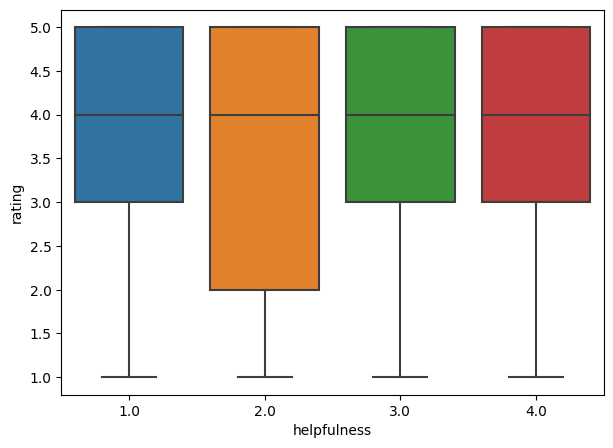

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['helpfulness'], y=df['rating'])

All ranks of the helpfulness have the same median of rating, which is 4.0. Since the first quartile of 2.0 helpfulness is lower than others, the ratings are clustered towards the higher values. Therefore, all ranks of helpfulness provide high ratings, which is between 3.0 and 5.0.




<Axes: xlabel='category', ylabel='rating'>

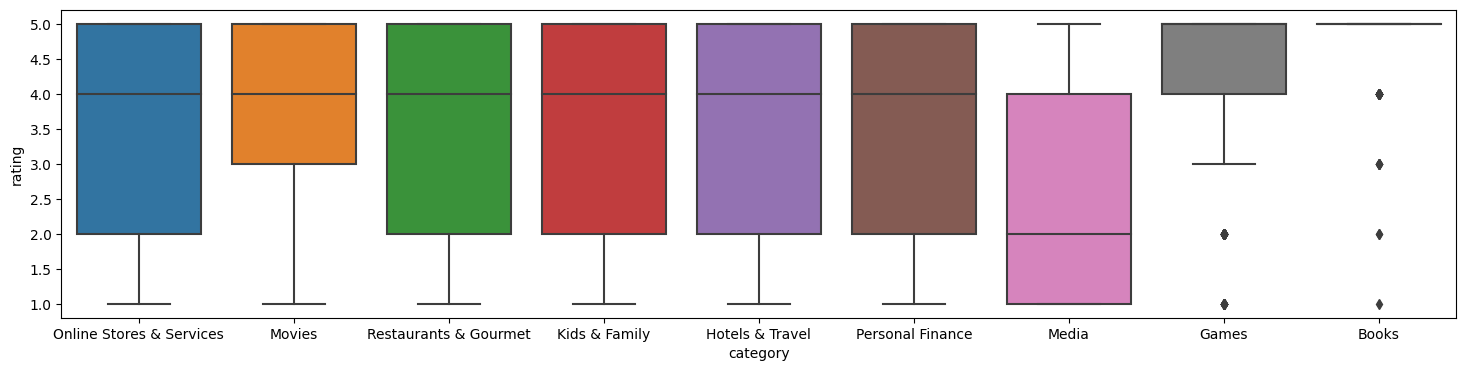

In [16]:
plt.figure(figsize=(18,4))
sns.boxplot(x=df['category'], y=df['rating'])

The categories that provide the same median of rating 4.0 are 'Online Stores & Services', 'Movies', 'Restaurants & Gourmet', 'Kids & Family', 'Hotels & travel category' and 'Personal Finance'. However, media tends to provide a lower rating, which the quartiles are between 1.0 and 4.0 and the median is 2.0. Games provide high ratings but there are outliers at 1.0 and 2.0. Books have outliers at all ratings


#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [17]:
df

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
6,33,32100,Go down under Mateys!!!!!,Outback Steakhouse,5.0,4.0,F,Restaurants & Gourmet,50,25.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19992,10805,11900,R.I.P,MTV,1.0,4.0,F,Media,39,138.00,18
19993,10805,12000,Leave them be...,Teletubbies,5.0,4.0,F,Kids & Family,76,48.25,18
19994,10805,50500,"Thank you, Drive Thru Please",McDonald's,3.0,3.0,F,Restaurants & Gourmet,41,30.74,18
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18


In [18]:
# your code and solutions
df1 = df.loc[df.helpfulness <= 2.0, 'review']
print(df1)

0                                Great job for what it is!
41                Why Use Amazon? What Advantage Is There?
122      Don't expect reasonable delivery or customer s...
144                                     Excellent service!
277                Avoid, avoid, avoid! Tell your friends!
                               ...                        
19551                   I will never be flying Delta again
19636                                Truly A great Company
19657                       Too many discs arrive damaged.
19870                                          Coaster Fun
19880                                           I Hate BOA
Name: review, Length: 364, dtype: object


In [25]:
df2 = df.groupby('userId')['rating'].count()
df3 = df2.drop(df2.index[(df.rating == '<7')])
print(df2)

userId
1326    0
1801    0
2128    0
2193    0
6669    0
6839    0
7274    0
7392    0
7694    0
8225    0
Name: rating, dtype: int64


In [20]:
df.loc[df['rating'] < 11.0, 'item']

0                        eBay
2        AOL (America Online)
3                        eBay
4         Blair Witch Project
6          Outback Steakhouse
                 ...         
19992                     MTV
19993             Teletubbies
19994              McDonald's
19995                 Wendy's
19997      Outback Steakhouse
Name: item, Length: 14064, dtype: object

In [21]:
df.drop(df.loc[df.helpfulness <= 2.0, 'review'].index, inplace=True)

In [23]:
df.drop(df.loc[df['rating'] < 11.0, 'item'].index, inplace=True)